In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from pathlib import Path
from matplotlib.ticker import MaxNLocator

In [2]:
# Create directory for images
Path("img").mkdir(parents=True, exist_ok=True)

In [3]:
# Set figure size
rcParams['figure.figsize'] = (4, 4)

In [4]:
# Set float format
pd.options.display.float_format = "{:,.2f}".format

# Goal

Asses quality of data.

In [5]:
path = '../flats-data/cleaned_data.csv'

In [6]:
data = pd.read_csv(path, lineterminator='\n')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35693 entries, 0 to 35692
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         35600 non-null  object 
 1   City         22682 non-null  object 
 2   District     18446 non-null  object 
 3   Amount       35570 non-null  float64
 4   Currency     35570 non-null  object 
 5   Property     35327 non-null  object 
 6   Seller       35491 non-null  object 
 7   Area         35382 non-null  float64
 8   Rooms        34975 non-null  float64
 9   Bathrooms    22633 non-null  float64
 10  Parking      14734 non-null  object 
 11  Garden       35693 non-null  bool   
 12  Balcony      35693 non-null  bool   
 13  Terrace      35693 non-null  bool   
 14  Lift         35693 non-null  bool   
 15  New          35693 non-null  bool   
 16  Estate       35693 non-null  bool   
 17  Townhouse    35693 non-null  bool   
 18  Apartment    35693 non-null  bool   
 19  Land

In [8]:
data = data.drop_duplicates(['Title'])

In [9]:
data.describe()

,Amount,Area,Rooms,Bathrooms
count,"6,857.00","6,771.00","6,687.00","3,980.00"
mean,"683,977.37",160.54,2.91,1.33
std,"720,455.69","4,404.97",1.33,0.64
min,1.00,1.00,1.00,1.00
25%,"398,000.00",43.00,2.00,1.00
50%,"502,000.00",57.00,3.00,1.00
75%,"722,000.00",82.00,4.00,2.00
max,"22,000,000.00","320,000.00",6.00,4.00


In [10]:
missing = (data.isna().sum(axis=0) / len(data)).to_frame()
missing.columns = ['Missing %']
missing = missing[missing['Missing %'] > 0]
missing.sort_values(['Missing %'], ascending=False)

,Missing %
Parking,0.67
District,0.42
Bathrooms,0.42
City,0.21
Description,0.17
Rooms,0.03
Area,0.01
Seller,0.01
Property,0.01
Amount,0.00


# Outliers

In [11]:
data = data[data['Amount'] >= 5 * 10 ** 4]
data = data[data['Amount'] <= 1.5 * 10 ** 6]
data = data[data['Area'] > 0]
data = data[data['Area'] <= 200]

# By time

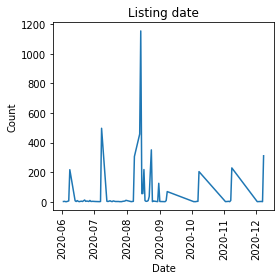

In [12]:
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])
data = data[data['Date'] >= pd.to_datetime('2020-06-01')]

time = data[['Date', 'Amount']]
time = time.groupby('Date', as_index=False)
time = time.count()
time = time.sort_values('Date', ascending=False)
time = time.rename(columns={'Amount': 'Count'})

plt.plot(time['Date'], time['Count'])
plt.title('Listing date')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Categorical features

## Mean price

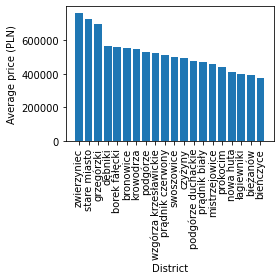

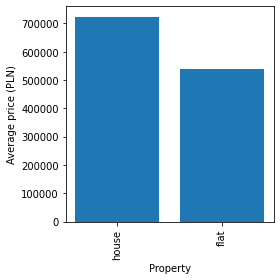

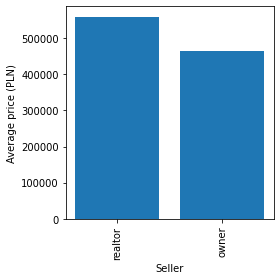

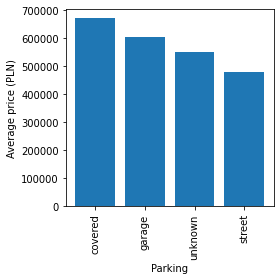

In [13]:
def bar_plot(col):

    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)

    plt.bar(group[col], group['Amount'])
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()    
    
cols = ['District', 'Property', 'Seller', 'Parking']    

for col in cols:
    bar_plot(col)

# Binary features

## Mean price

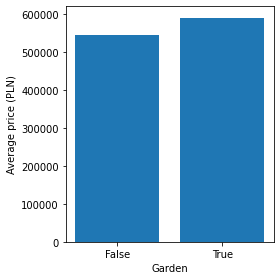

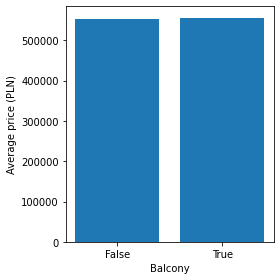

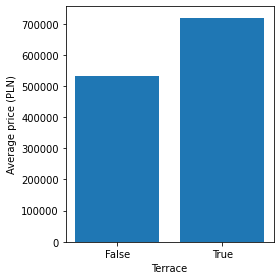

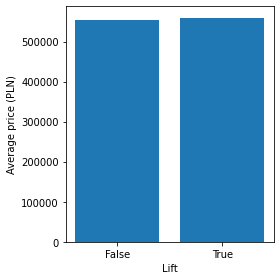

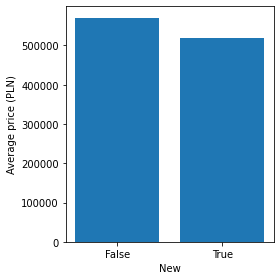

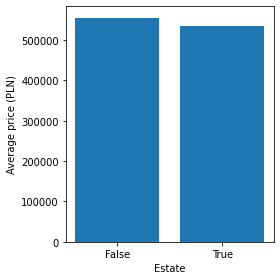

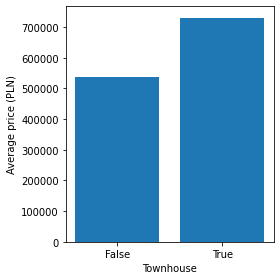

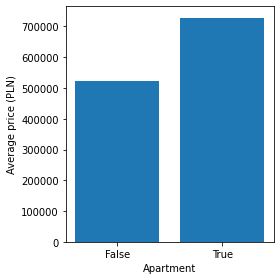

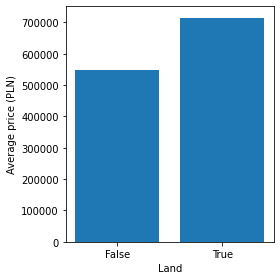

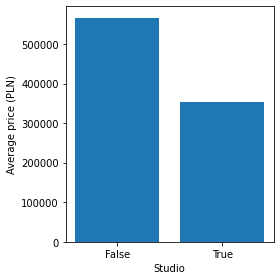

In [14]:
def bar_plot_binary(col):
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)
    plt.bar(group[col], height=group['Amount'])
    plt.xticks(ticks=group[col].to_list(),
               labels=group[col].to_list())
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()
    
cols = data.select_dtypes(bool).columns.to_list()
for col in cols:
    bar_plot_binary(col=col)    

# Numeric features

## Mean price

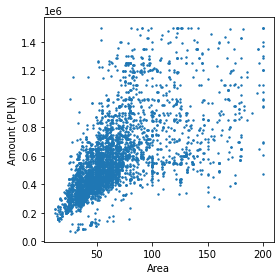

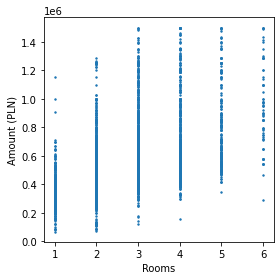

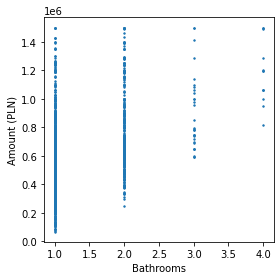

In [15]:
def scatter_plot(col):
    plt.scatter(data[col], data['Amount'], s=2)
    plt.xlabel(f'{col}')
    plt.ylabel(f'Amount (PLN)')
    plt.tight_layout()
    plt.show()

cols = ['Area', 'Rooms', 'Bathrooms']
for col in cols:
    scatter_plot(col=col)

## Relationship with price

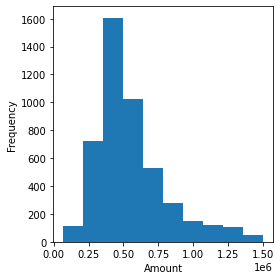

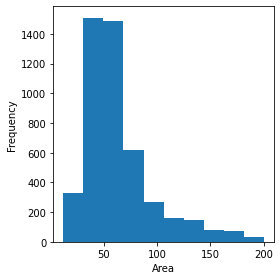

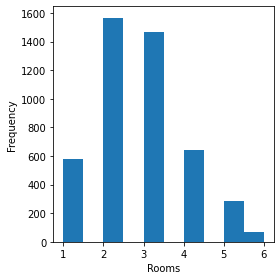

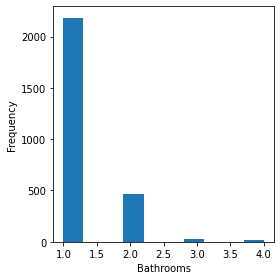

In [16]:
def histogram_plot(col):
    plt.hist(data[col])

#     ax = plt.gca()
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
    
    plt.ylabel('Frequency')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()
    
cols = ['Amount', 'Area', 'Rooms', 'Bathrooms']

for col in cols:
    histogram_plot(col=col)

# Frequency

In [17]:
freq = data[['District', 'Property', 'Amount']]
freq = freq.groupby(['District', 'Property'], as_index=False)
freq = freq.count()
freq = freq.rename(columns={'Amount': 'Count'})
freq = freq.sort_values('Count', ascending=False)
freq = freq.reset_index(drop=True)
freq.head(20)

,District,Property,Count
0,krowodrza,flat,383
1,podgórze,flat,319
2,stare miasto,flat,292
3,nowa huta,flat,257
4,dębniki,flat,177
5,bronowice,flat,174
6,prądnik biały,flat,142
7,bieżanów,flat,133
8,grzegórzki,flat,122
9,prądnik czerwony,flat,114


# Correlation

In [18]:
C = data.select_dtypes(float).corr()
C

,Amount,Area,Rooms,Bathrooms
Amount,1.00,0.63,0.53,0.41
Area,0.63,1.00,0.81,0.64
Rooms,0.53,0.81,1.00,0.57
Bathrooms,0.41,0.64,0.57,1.00


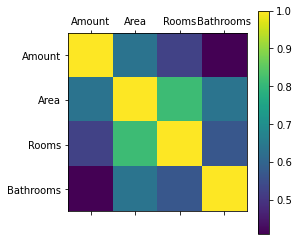

In [19]:
plt.matshow(C)
plt.xticks(range(len(C.columns)), C.columns)
plt.yticks(range(len(C.columns)), C.columns)
plt.colorbar()
plt.show()